In [1]:
import torch 
from PIL import Image, ImageOps
from torchvision import transforms
import yaml
from yaml.loader import SafeLoader
from munch import DefaultMunch
from tensorboardX import SummaryWriter
import time
import utils
from tqdm import tqdm
import argparse
import os
import pprint
import shutil
import sys

import time
import timeit
from pathlib import Path

import numpy as np

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from utils_v2 import LandmarkEvaluator as _evaluator
import _init_paths
import models
import datasets
from config import config
from config import update_config
from datasets import CustlrDataset
import cv2
from torch.nn import functional as F
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("../")
class args():
    cfg= "experiments\lip\seg_hrnet_w48_473x473_sgd_lr7e-3_wd5e-4_bs_40_epoch150.yaml"
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
args = args()
update_config(config, args)

dataset 4
(12, 224, 224)
(224, 224)


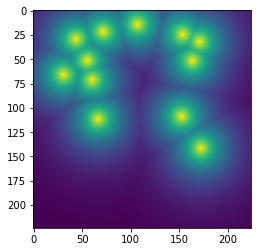

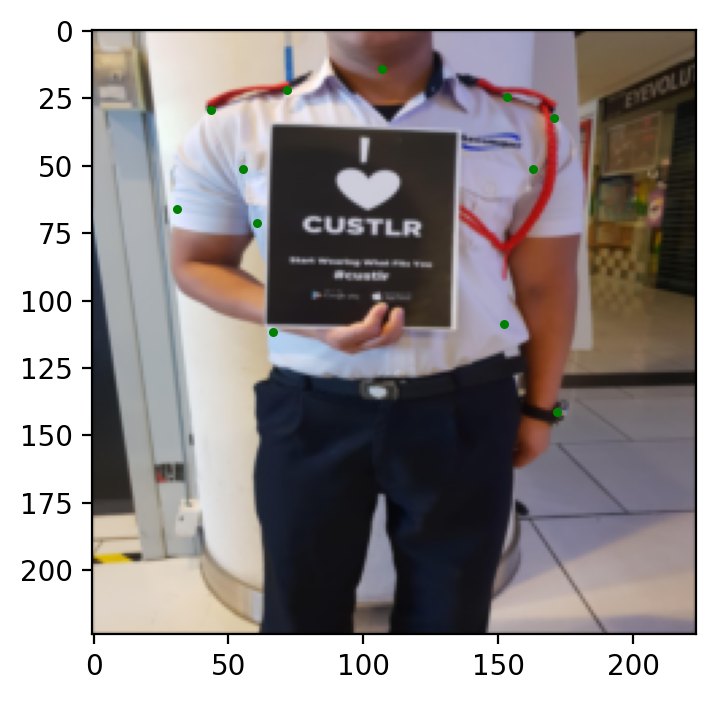

In [3]:
predcsv='data_body_landmark/custlr/auged/test.csv'
df = pd.read_csv(predcsv)
df = df.iloc[:6, :]
dataset = CustlrDataset(df, mode='NOCROP')
print('dataset', len(dataset))
dataset.plot_landmark_map(0)
dataset.plot_sample(0)


In [4]:
ldr = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0)
EPOCH = 1
val_pos_loss = []

# when load empty model, make sure to set the number of landmark maps as the output channel of the model
out_channel = dataset[0]['landmark_map'].shape[0]

evaluator = _evaluator(out_channel)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# load empty model
model = eval('models.seg_hrnet_bodylandmark.get_seg_body_model')(config)
dictname = 'lm param epoch=40 lr =0.0275R=12921-78 dataset 99.pkl'
statedict = torch.load(dictname)

val_pos_loss = []
# load model state
model.load_state_dict(statedict)
for i, param in enumerate(model.parameters()):
    param.requires_grad = False

model.eval()
model.to(device)

for e in range(EPOCH):
    for i, sample in enumerate(ldr):
        for key in sample:
            sample[key] = sample[key].to(device)
        output = model(sample)
        evaluator.add(output, sample)

        print(output['lm_pos_output'][0])
        dataset.plot_sample(i)
         # body landmarks
        plt.scatter(output['lm_pos_output'][0,:,0]*224,output['lm_pos_output'][0,:,1]*224, s=5, color='red')
        predname = 'pred_visualized/gt/test/'+'img'+str(i)+'.jpg'
        # plt.savefig(predname)
        plt.show()

        landmark_map = np.max(output['lm_pos_map'][0].cpu().numpy(), axis=0)
        plt.imshow(landmark_map)
        predname = 'pred_visualized/alt/v3_mine-v-gdrive/'+'hm'+str(i)+'.jpg'
        # plt.savefig(predname)

    ret = evaluator.evaluate()
    val_pos_loss.append(ret['lm_dist'])
# show avg losses
print(val_pos_loss)
print(ret['lm_individual_dist'])

RuntimeError: Error(s) in loading state_dict for LandmarkExpNetwork:
	Missing key(s) in state_dict: "attention_pred_net1.model.model.0.weight", "attention_pred_net1.model.model.1.model.1.weight", "attention_pred_net1.model.model.1.model.2.weight", "attention_pred_net1.model.model.1.model.2.bias", "attention_pred_net1.model.model.1.model.2.running_mean", "attention_pred_net1.model.model.1.model.2.running_var", "attention_pred_net1.model.model.1.model.3.model.1.weight", "attention_pred_net1.model.model.1.model.3.model.2.weight", "attention_pred_net1.model.model.1.model.3.model.2.bias", "attention_pred_net1.model.model.1.model.3.model.2.running_mean", "attention_pred_net1.model.model.1.model.3.model.2.running_var", "attention_pred_net1.model.model.1.model.3.model.3.model.1.weight", "attention_pred_net1.model.model.1.model.3.model.3.model.3.weight", "attention_pred_net1.model.model.1.model.3.model.3.model.3.bias", "attention_pred_net1.model.model.1.model.3.model.3.model.4.weight", "attention_pred_net1.model.model.1.model.3.model.3.model.4.bias", "attention_pred_net1.model.model.1.model.3.model.3.model.4.running_mean", "attention_pred_net1.model.model.1.model.3.model.3.model.4.running_var", "attention_pred_net1.model.model.1.model.3.model.5.weight", "attention_pred_net1.model.model.1.model.3.model.6.weight", "attention_pred_net1.model.model.1.model.3.model.6.bias", "attention_pred_net1.model.model.1.model.3.model.6.running_mean", "attention_pred_net1.model.model.1.model.3.model.6.running_var", "attention_pred_net1.model.model.1.model.5.weight", "attention_pred_net1.model.model.1.model.6.weight", "attention_pred_net1.model.model.1.model.6.bias", "attention_pred_net1.model.model.1.model.6.running_mean", "attention_pred_net1.model.model.1.model.6.running_var", "attention_pred_net1.model.model.3.weight", "attention_pred_net1.model.model.3.bias", "LM_branch.stage5.1.branches.0.0.conv1.weight", "LM_branch.stage5.1.branches.0.0.bn1.weight", "LM_branch.stage5.1.branches.0.0.bn1.bias", "LM_branch.stage5.1.branches.0.0.bn1.running_mean", "LM_branch.stage5.1.branches.0.0.bn1.running_var", "LM_branch.stage5.1.branches.0.0.conv2.weight", "LM_branch.stage5.1.branches.0.0.bn2.weight", "LM_branch.stage5.1.branches.0.0.bn2.bias", "LM_branch.stage5.1.branches.0.0.bn2.running_mean", "LM_branch.stage5.1.branches.0.0.bn2.running_var", "LM_branch.stage5.1.branches.0.1.conv1.weight", "LM_branch.stage5.1.branches.0.1.bn1.weight", "LM_branch.stage5.1.branches.0.1.bn1.bias", "LM_branch.stage5.1.branches.0.1.bn1.running_mean", "LM_branch.stage5.1.branches.0.1.bn1.running_var", "LM_branch.stage5.1.branches.0.1.conv2.weight", "LM_branch.stage5.1.branches.0.1.bn2.weight", "LM_branch.stage5.1.branches.0.1.bn2.bias", "LM_branch.stage5.1.branches.0.1.bn2.running_mean", "LM_branch.stage5.1.branches.0.1.bn2.running_var", "LM_branch.stage5.1.branches.0.2.conv1.weight", "LM_branch.stage5.1.branches.0.2.bn1.weight", "LM_branch.stage5.1.branches.0.2.bn1.bias", "LM_branch.stage5.1.branches.0.2.bn1.running_mean", "LM_branch.stage5.1.branches.0.2.bn1.running_var", "LM_branch.stage5.1.branches.0.2.conv2.weight", "LM_branch.stage5.1.branches.0.2.bn2.weight", "LM_branch.stage5.1.branches.0.2.bn2.bias", "LM_branch.stage5.1.branches.0.2.bn2.running_mean", "LM_branch.stage5.1.branches.0.2.bn2.running_var", "LM_branch.stage5.1.branches.0.3.conv1.weight", "LM_branch.stage5.1.branches.0.3.bn1.weight", "LM_branch.stage5.1.branches.0.3.bn1.bias", "LM_branch.stage5.1.branches.0.3.bn1.running_mean", "LM_branch.stage5.1.branches.0.3.bn1.running_var", "LM_branch.stage5.1.branches.0.3.conv2.weight", "LM_branch.stage5.1.branches.0.3.bn2.weight", "LM_branch.stage5.1.branches.0.3.bn2.bias", "LM_branch.stage5.1.branches.0.3.bn2.running_mean", "LM_branch.stage5.1.branches.0.3.bn2.running_var", "LM_branch.stage5.1.branches.1.0.conv1.weight", "LM_branch.stage5.1.branches.1.0.bn1.weight", "LM_branch.stage5.1.branches.1.0.bn1.bias", "LM_branch.stage5.1.branches.1.0.bn1.running_mean", "LM_branch.stage5.1.branches.1.0.bn1.running_var", "LM_branch.stage5.1.branches.1.0.conv2.weight", "LM_branch.stage5.1.branches.1.0.bn2.weight", "LM_branch.stage5.1.branches.1.0.bn2.bias", "LM_branch.stage5.1.branches.1.0.bn2.running_mean", "LM_branch.stage5.1.branches.1.0.bn2.running_var", "LM_branch.stage5.1.branches.1.1.conv1.weight", "LM_branch.stage5.1.branches.1.1.bn1.weight", "LM_branch.stage5.1.branches.1.1.bn1.bias", "LM_branch.stage5.1.branches.1.1.bn1.running_mean", "LM_branch.stage5.1.branches.1.1.bn1.running_var", "LM_branch.stage5.1.branches.1.1.conv2.weight", "LM_branch.stage5.1.branches.1.1.bn2.weight", "LM_branch.stage5.1.branches.1.1.bn2.bias", "LM_branch.stage5.1.branches.1.1.bn2.running_mean", "LM_branch.stage5.1.branches.1.1.bn2.running_var", "LM_branch.stage5.1.branches.1.2.conv1.weight", "LM_branch.stage5.1.branches.1.2.bn1.weight", "LM_branch.stage5.1.branches.1.2.bn1.bias", "LM_branch.stage5.1.branches.1.2.bn1.running_mean", "LM_branch.stage5.1.branches.1.2.bn1.running_var", "LM_branch.stage5.1.branches.1.2.conv2.weight", "LM_branch.stage5.1.branches.1.2.bn2.weight", "LM_branch.stage5.1.branches.1.2.bn2.bias", "LM_branch.stage5.1.branches.1.2.bn2.running_mean", "LM_branch.stage5.1.branches.1.2.bn2.running_var", "LM_branch.stage5.1.branches.1.3.conv1.weight", "LM_branch.stage5.1.branches.1.3.bn1.weight", "LM_branch.stage5.1.branches.1.3.bn1.bias", "LM_branch.stage5.1.branches.1.3.bn1.running_mean", "LM_branch.stage5.1.branches.1.3.bn1.running_var", "LM_branch.stage5.1.branches.1.3.conv2.weight", "LM_branch.stage5.1.branches.1.3.bn2.weight", "LM_branch.stage5.1.branches.1.3.bn2.bias", "LM_branch.stage5.1.branches.1.3.bn2.running_mean", "LM_branch.stage5.1.branches.1.3.bn2.running_var", "LM_branch.stage5.1.branches.2.0.conv1.weight", "LM_branch.stage5.1.branches.2.0.bn1.weight", "LM_branch.stage5.1.branches.2.0.bn1.bias", "LM_branch.stage5.1.branches.2.0.bn1.running_mean", "LM_branch.stage5.1.branches.2.0.bn1.running_var", "LM_branch.stage5.1.branches.2.0.conv2.weight", "LM_branch.stage5.1.branches.2.0.bn2.weight", "LM_branch.stage5.1.branches.2.0.bn2.bias", "LM_branch.stage5.1.branches.2.0.bn2.running_mean", "LM_branch.stage5.1.branches.2.0.bn2.running_var", "LM_branch.stage5.1.branches.2.1.conv1.weight", "LM_branch.stage5.1.branches.2.1.bn1.weight", "LM_branch.stage5.1.branches.2.1.bn1.bias", "LM_branch.stage5.1.branches.2.1.bn1.running_mean", "LM_branch.stage5.1.branches.2.1.bn1.running_var", "LM_branch.stage5.1.branches.2.1.conv2.weight", "LM_branch.stage5.1.branches.2.1.bn2.weight", "LM_branch.stage5.1.branches.2.1.bn2.bias", "LM_branch.stage5.1.branches.2.1.bn2.running_mean", "LM_branch.stage5.1.branches.2.1.bn2.running_var", "LM_branch.stage5.1.branches.2.2.conv1.weight", "LM_branch.stage5.1.branches.2.2.bn1.weight", "LM_branch.stage5.1.branches.2.2.bn1.bias", "LM_branch.stage5.1.branches.2.2.bn1.running_mean", "LM_branch.stage5.1.branches.2.2.bn1.running_var", "LM_branch.stage5.1.branches.2.2.conv2.weight", "LM_branch.stage5.1.branches.2.2.bn2.weight", "LM_branch.stage5.1.branches.2.2.bn2.bias", "LM_branch.stage5.1.branches.2.2.bn2.running_mean", "LM_branch.stage5.1.branches.2.2.bn2.running_var", "LM_branch.stage5.1.branches.2.3.conv1.weight", "LM_branch.stage5.1.branches.2.3.bn1.weight", "LM_branch.stage5.1.branches.2.3.bn1.bias", "LM_branch.stage5.1.branches.2.3.bn1.running_mean", "LM_branch.stage5.1.branches.2.3.bn1.running_var", "LM_branch.stage5.1.branches.2.3.conv2.weight", "LM_branch.stage5.1.branches.2.3.bn2.weight", "LM_branch.stage5.1.branches.2.3.bn2.bias", "LM_branch.stage5.1.branches.2.3.bn2.running_mean", "LM_branch.stage5.1.branches.2.3.bn2.running_var", "LM_branch.stage5.1.branches.3.0.conv1.weight", "LM_branch.stage5.1.branches.3.0.bn1.weight", "LM_branch.stage5.1.branches.3.0.bn1.bias", "LM_branch.stage5.1.branches.3.0.bn1.running_mean", "LM_branch.stage5.1.branches.3.0.bn1.running_var", "LM_branch.stage5.1.branches.3.0.conv2.weight", "LM_branch.stage5.1.branches.3.0.bn2.weight", "LM_branch.stage5.1.branches.3.0.bn2.bias", "LM_branch.stage5.1.branches.3.0.bn2.running_mean", "LM_branch.stage5.1.branches.3.0.bn2.running_var", "LM_branch.stage5.1.branches.3.1.conv1.weight", "LM_branch.stage5.1.branches.3.1.bn1.weight", "LM_branch.stage5.1.branches.3.1.bn1.bias", "LM_branch.stage5.1.branches.3.1.bn1.running_mean", "LM_branch.stage5.1.branches.3.1.bn1.running_var", "LM_branch.stage5.1.branches.3.1.conv2.weight", "LM_branch.stage5.1.branches.3.1.bn2.weight", "LM_branch.stage5.1.branches.3.1.bn2.bias", "LM_branch.stage5.1.branches.3.1.bn2.running_mean", "LM_branch.stage5.1.branches.3.1.bn2.running_var", "LM_branch.stage5.1.branches.3.2.conv1.weight", "LM_branch.stage5.1.branches.3.2.bn1.weight", "LM_branch.stage5.1.branches.3.2.bn1.bias", "LM_branch.stage5.1.branches.3.2.bn1.running_mean", "LM_branch.stage5.1.branches.3.2.bn1.running_var", "LM_branch.stage5.1.branches.3.2.conv2.weight", "LM_branch.stage5.1.branches.3.2.bn2.weight", "LM_branch.stage5.1.branches.3.2.bn2.bias", "LM_branch.stage5.1.branches.3.2.bn2.running_mean", "LM_branch.stage5.1.branches.3.2.bn2.running_var", "LM_branch.stage5.1.branches.3.3.conv1.weight", "LM_branch.stage5.1.branches.3.3.bn1.weight", "LM_branch.stage5.1.branches.3.3.bn1.bias", "LM_branch.stage5.1.branches.3.3.bn1.running_mean", "LM_branch.stage5.1.branches.3.3.bn1.running_var", "LM_branch.stage5.1.branches.3.3.conv2.weight", "LM_branch.stage5.1.branches.3.3.bn2.weight", "LM_branch.stage5.1.branches.3.3.bn2.bias", "LM_branch.stage5.1.branches.3.3.bn2.running_mean", "LM_branch.stage5.1.branches.3.3.bn2.running_var", "LM_branch.stage5.1.fuse_layers.0.1.0.weight", "LM_branch.stage5.1.fuse_layers.0.1.1.weight", "LM_branch.stage5.1.fuse_layers.0.1.1.bias", "LM_branch.stage5.1.fuse_layers.0.1.1.running_mean", "LM_branch.stage5.1.fuse_layers.0.1.1.running_var", "LM_branch.stage5.1.fuse_layers.0.2.0.weight", "LM_branch.stage5.1.fuse_layers.0.2.1.weight", "LM_branch.stage5.1.fuse_layers.0.2.1.bias", "LM_branch.stage5.1.fuse_layers.0.2.1.running_mean", "LM_branch.stage5.1.fuse_layers.0.2.1.running_var", "LM_branch.stage5.1.fuse_layers.0.3.0.weight", "LM_branch.stage5.1.fuse_layers.0.3.1.weight", "LM_branch.stage5.1.fuse_layers.0.3.1.bias", "LM_branch.stage5.1.fuse_layers.0.3.1.running_mean", "LM_branch.stage5.1.fuse_layers.0.3.1.running_var", "LM_branch.stage5.1.fuse_layers.1.0.0.0.weight", "LM_branch.stage5.1.fuse_layers.1.0.0.1.weight", "LM_branch.stage5.1.fuse_layers.1.0.0.1.bias", "LM_branch.stage5.1.fuse_layers.1.0.0.1.running_mean", "LM_branch.stage5.1.fuse_layers.1.0.0.1.running_var", "LM_branch.stage5.1.fuse_layers.1.2.0.weight", "LM_branch.stage5.1.fuse_layers.1.2.1.weight", "LM_branch.stage5.1.fuse_layers.1.2.1.bias", "LM_branch.stage5.1.fuse_layers.1.2.1.running_mean", "LM_branch.stage5.1.fuse_layers.1.2.1.running_var", "LM_branch.stage5.1.fuse_layers.1.3.0.weight", "LM_branch.stage5.1.fuse_layers.1.3.1.weight", "LM_branch.stage5.1.fuse_layers.1.3.1.bias", "LM_branch.stage5.1.fuse_layers.1.3.1.running_mean", "LM_branch.stage5.1.fuse_layers.1.3.1.running_var", "LM_branch.stage5.1.fuse_layers.2.0.0.0.weight", "LM_branch.stage5.1.fuse_layers.2.0.0.1.weight", "LM_branch.stage5.1.fuse_layers.2.0.0.1.bias", "LM_branch.stage5.1.fuse_layers.2.0.0.1.running_mean", "LM_branch.stage5.1.fuse_layers.2.0.0.1.running_var", "LM_branch.stage5.1.fuse_layers.2.0.1.0.weight", "LM_branch.stage5.1.fuse_layers.2.0.1.1.weight", "LM_branch.stage5.1.fuse_layers.2.0.1.1.bias", "LM_branch.stage5.1.fuse_layers.2.0.1.1.running_mean", "LM_branch.stage5.1.fuse_layers.2.0.1.1.running_var", "LM_branch.stage5.1.fuse_layers.2.1.0.0.weight", "LM_branch.stage5.1.fuse_layers.2.1.0.1.weight", "LM_branch.stage5.1.fuse_layers.2.1.0.1.bias", "LM_branch.stage5.1.fuse_layers.2.1.0.1.running_mean", "LM_branch.stage5.1.fuse_layers.2.1.0.1.running_var", "LM_branch.stage5.1.fuse_layers.2.3.0.weight", "LM_branch.stage5.1.fuse_layers.2.3.1.weight", "LM_branch.stage5.1.fuse_layers.2.3.1.bias", "LM_branch.stage5.1.fuse_layers.2.3.1.running_mean", "LM_branch.stage5.1.fuse_layers.2.3.1.running_var", "LM_branch.stage5.1.fuse_layers.3.0.0.0.weight", "LM_branch.stage5.1.fuse_layers.3.0.0.1.weight", "LM_branch.stage5.1.fuse_layers.3.0.0.1.bias", "LM_branch.stage5.1.fuse_layers.3.0.0.1.running_mean", "LM_branch.stage5.1.fuse_layers.3.0.0.1.running_var", "LM_branch.stage5.1.fuse_layers.3.0.1.0.weight", "LM_branch.stage5.1.fuse_layers.3.0.1.1.weight", "LM_branch.stage5.1.fuse_layers.3.0.1.1.bias", "LM_branch.stage5.1.fuse_layers.3.0.1.1.running_mean", "LM_branch.stage5.1.fuse_layers.3.0.1.1.running_var", "LM_branch.stage5.1.fuse_layers.3.0.2.0.weight", "LM_branch.stage5.1.fuse_layers.3.0.2.1.weight", "LM_branch.stage5.1.fuse_layers.3.0.2.1.bias", "LM_branch.stage5.1.fuse_layers.3.0.2.1.running_mean", "LM_branch.stage5.1.fuse_layers.3.0.2.1.running_var", "LM_branch.stage5.1.fuse_layers.3.1.0.0.weight", "LM_branch.stage5.1.fuse_layers.3.1.0.1.weight", "LM_branch.stage5.1.fuse_layers.3.1.0.1.bias", "LM_branch.stage5.1.fuse_layers.3.1.0.1.running_mean", "LM_branch.stage5.1.fuse_layers.3.1.0.1.running_var", "LM_branch.stage5.1.fuse_layers.3.1.1.0.weight", "LM_branch.stage5.1.fuse_layers.3.1.1.1.weight", "LM_branch.stage5.1.fuse_layers.3.1.1.1.bias", "LM_branch.stage5.1.fuse_layers.3.1.1.1.running_mean", "LM_branch.stage5.1.fuse_layers.3.1.1.1.running_var", "LM_branch.stage5.1.fuse_layers.3.2.0.0.weight", "LM_branch.stage5.1.fuse_layers.3.2.0.1.weight", "LM_branch.stage5.1.fuse_layers.3.2.0.1.bias", "LM_branch.stage5.1.fuse_layers.3.2.0.1.running_mean", "LM_branch.stage5.1.fuse_layers.3.2.0.1.running_var". 

C:\Users\timng\anaconda3\envs\pytorch1.7\lib\site-packages\torch\nn\functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


[[0.21818182 0.18181818]
 [0.83636364 0.21818182]
 [0.16363636 0.07272727]
 [0.2        0.12727273]
 [0.54545455 0.        ]
 [0.67272727 0.07272727]
 [0.81818182 0.12727273]
 [0.16363636 0.18181818]
 [0.23636364 0.32727273]
 [0.23636364 0.50909091]
 [0.69090909 0.50909091]
 [0.83636364 0.54545455]]


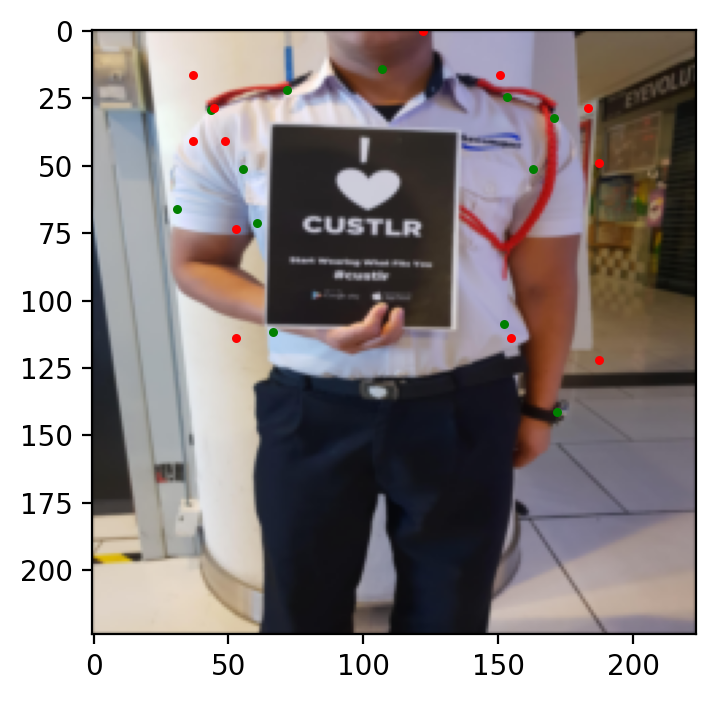

[[0.23636364 0.21818182]
 [0.72727273 0.2       ]
 [0.16363636 0.09090909]
 [0.32727273 0.16363636]
 [0.38181818 0.03636364]
 [0.67272727 0.07272727]
 [0.81818182 0.10909091]
 [0.12727273 0.30909091]
 [0.16363636 0.32727273]
 [0.16363636 0.50909091]
 [0.47272727 0.49090909]
 [0.78181818 0.76363636]]


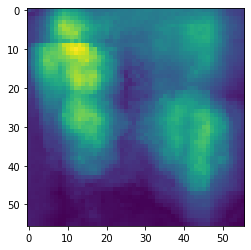

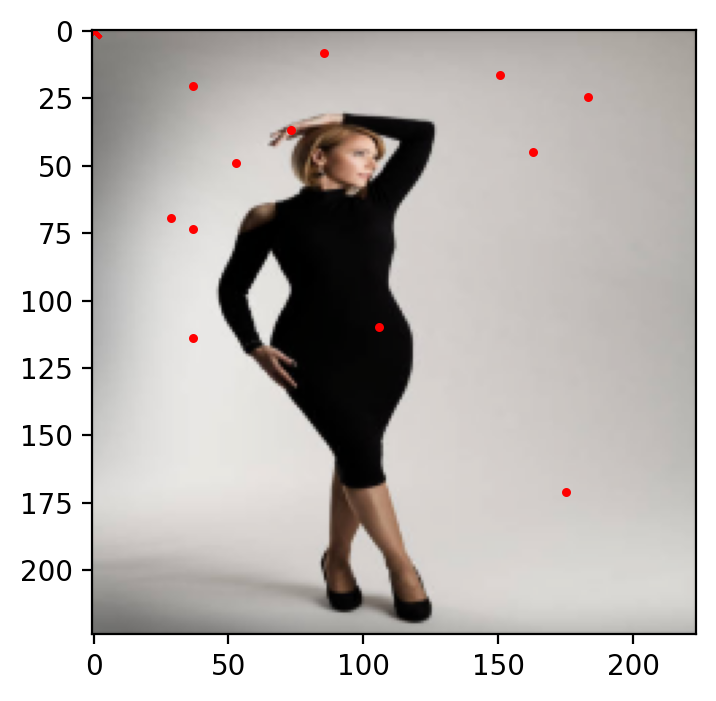

[[0.23636364 0.18181818]
 [0.78181818 0.23636364]
 [0.16363636 0.07272727]
 [0.27272727 0.        ]
 [0.38181818 0.        ]
 [0.54545455 0.09090909]
 [0.83636364 0.12727273]
 [0.16363636 0.30909091]
 [0.16363636 0.30909091]
 [0.23636364 0.50909091]
 [0.69090909 0.47272727]
 [0.81818182 0.52727273]]


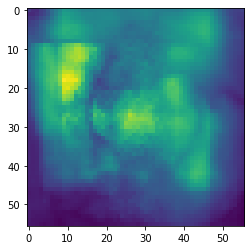

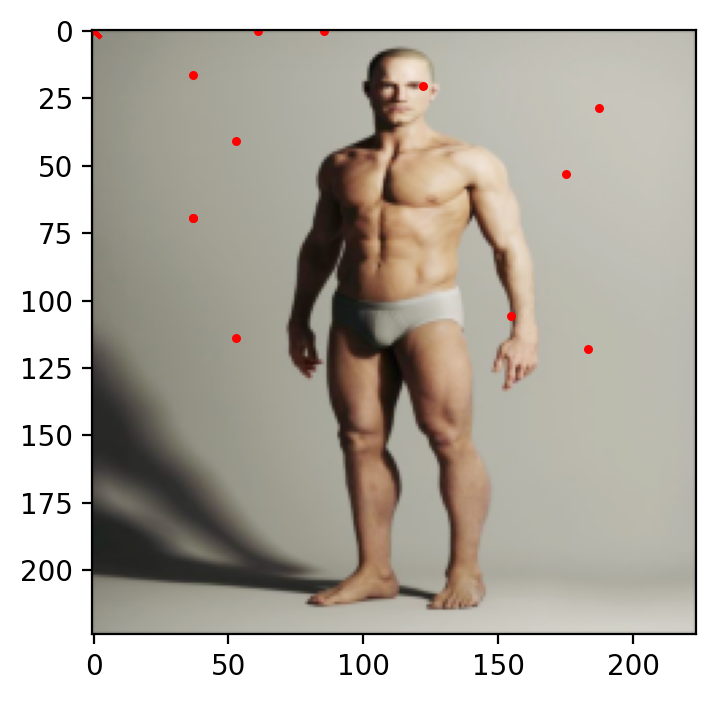

[0.07438524605713352]
[0.05480725 0.10874525 0.06587338 0.12380808 0.09299068 0.03901455
 0.05866758 0.11572352 0.03462007 0.06229315 0.02652117 0.10955828]


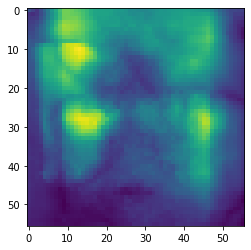

In [4]:
lm param epoch=40 lr =0.0275R=12921-78 dataset 99.pkl

Building model
Loading model...
dataset 1
(12, 224, 224)
(224, 224)


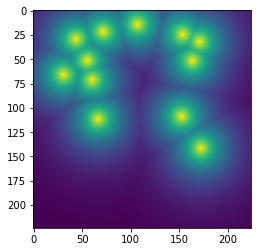

[[0.21818182 0.18181818]
 [0.70909091 0.18181818]
 [0.21818182 0.16363636]
 [0.52727273 0.07272727]
 [0.52727273 0.07272727]
 [0.52727273 0.07272727]
 [0.52727273 0.07272727]
 [0.18181818 0.16363636]
 [0.27272727 0.30909091]
 [0.25454545 0.49090909]
 [0.83636364 0.38181818]
 [0.83636364 0.52727273]]


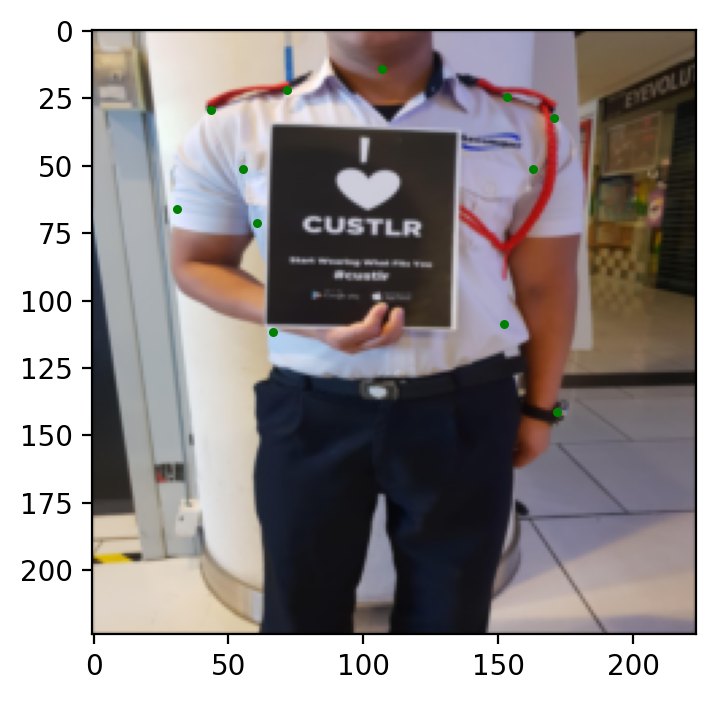

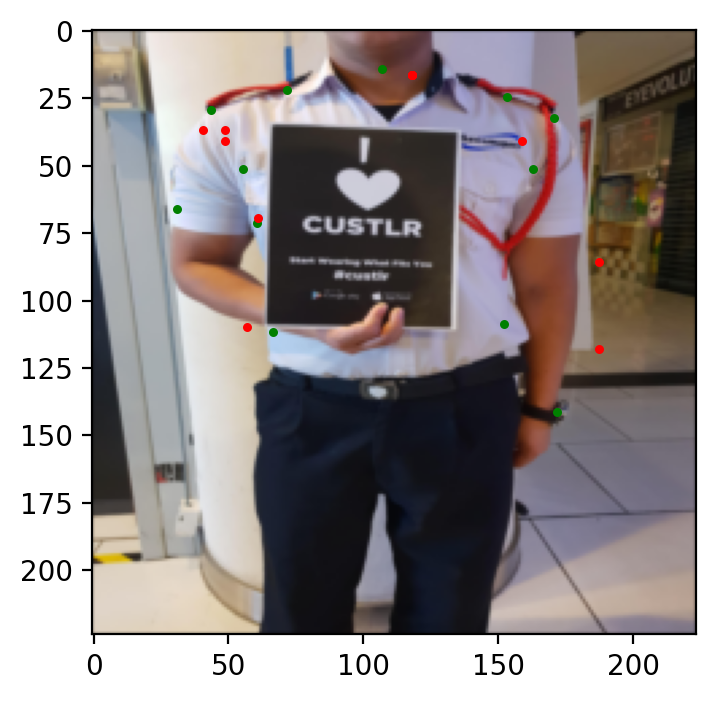

[0.10960502859696454]
[0.05480725 0.05104965 0.04039437 0.20860999 0.05060926 0.16099213
 0.24517449 0.13817304 0.00979624 0.04361625 0.18776939 0.12426829]


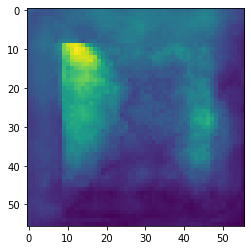

[[[ 79.85454545 164.14545455]
  [ 17.74545455 221.81818182]
  [102.03636364 119.78181818]
  [124.21818182  66.54545455]
  [  4.43636364   0.        ]
  [ 17.74545455   4.43636364]
  [212.94545455 159.70909091]
  [ 53.23636364   4.43636364]
  [  4.43636364   0.        ]
  [  0.           0.        ]
  [ 48.8         31.05454545]
  [ 93.16363636  13.30909091]]]


tensor([[[ 55.3333,  51.1667],
         [163.1111,  51.3333],
         [ 43.5556,  29.3333],
         [ 71.7037,  21.7778],
         [106.9630,  14.2222],
         [153.1852,  24.6667],
         [170.6667,  32.2222],
         [ 30.8889,  66.0000],
         [ 60.4444,  71.3333],
         [ 66.6667, 111.5000],
         [152.2222, 108.6667],
         [172.0000, 141.3333]]], device='cuda:0')


In [5]:
model.eval()

LandmarkExpNetwork(
  (seg_hrnet): HighResolutionNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, af